In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install catboost

## Import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/customer_churn/customer_churn_dataset-training-master.csv', sep=';')
df = pd.DataFrame(data)

<ipython-input-46-98d44c3f5466>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/dataset/customer_churn/customer_churn_dataset-training-master.csv', sep=';')


In [ ]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38.00,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38.00,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31.00,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55.00,2.0,0.0


## Data Preparation

In [ ]:
df = df.drop(columns = 'CustomerID')
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38.00,8.0,0.0
440829,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38.00,2.0,0.0
440830,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31.00,9.0,0.0
440831,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55.00,2.0,0.0


In [ ]:
list(df.columns)

['Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [ ]:
new_column_names = {col : col.replace(' ','_') for col in df.columns}
df = df.rename(columns = new_column_names)

In [ ]:
list(df.columns)

['Age',
 'Gender',
 'Tenure',
 'Usage_Frequency',
 'Support_Calls',
 'Payment_Delay',
 'Subscription_Type',
 'Contract_Length',
 'Total_Spend',
 'Last_Interaction',
 'Churn']

In [ ]:
df.isna().sum()

,0
Age,1
Gender,1
Tenure,1
Usage_Frequency,1
Support_Calls,1
Payment_Delay,1
Subscription_Type,1
Contract_Length,1
Total_Spend,1
Last_Interaction,1


In [ ]:
df[df['Age'].isna()]

,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop(199295)
df = df.reset_index(drop = True)
df

,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440827,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38.00,8.0,0.0
440828,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38.00,2.0,0.0
440829,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31.00,9.0,0.0
440830,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55.00,2.0,0.0


In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
Tenure,0
Usage_Frequency,0
Support_Calls,0
Payment_Delay,0
Subscription_Type,0
Contract_Length,0
Total_Spend,0
Last_Interaction,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440832 entries, 0 to 440831
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage_Frequency    440832 non-null  float64
 4   Support_Calls      440832 non-null  float64
 5   Payment_Delay      440832 non-null  float64
 6   Subscription_Type  440832 non-null  object 
 7   Contract_Length    440832 non-null  object 
 8   Total_Spend        440832 non-null  object 
 9   Last_Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(7), object(4)
memory usage: 37.0+ MB


In [ ]:
df['Total_Spend'] = df['Total_Spend'].apply(lambda x: str(x)[:3])
df['Total_Spend'] = pd.to_numeric(df['Total_Spend'], errors='coerce')
df

,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440827,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716,8.0,0.0
440828,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745,2.0,0.0
440829,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977,9.0,0.0
440830,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602,2.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440832 entries, 0 to 440831
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage_Frequency    440832 non-null  float64
 4   Support_Calls      440832 non-null  float64
 5   Payment_Delay      440832 non-null  float64
 6   Subscription_Type  440832 non-null  object 
 7   Contract_Length    440832 non-null  object 
 8   Total_Spend        440832 non-null  int64  
 9   Last_Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 37.0+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,440832.0,39.373153,12.442369,18.0,29.0,39.0,48.0,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.0,32.0,46.0,60.0
Usage_Frequency,440832.0,15.807494,8.586242,1.0,9.0,16.0,23.0,30.0
Support_Calls,440832.0,3.604437,3.070218,0.0,1.0,3.0,6.0,10.0
Payment_Delay,440832.0,12.965722,8.258063,0.0,6.0,12.0,19.0,30.0
Total_Spend,440832.0,631.118154,240.799172,100.0,480.0,660.0,830.0,999.0
Last_Interaction,440832.0,14.480868,8.596208,1.0,7.0,14.0,22.0,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.0,1.0,1.0,1.0


## EDA / Exploratory Data Analysis

Beberapa pertanyaan untuk mendapatkan insight dari dataset ini:
1. **Distribusi Usia dan Tingkat Churn:** Bagaimana distribusi usia di antara pelanggan Anda? Apakah ada hubungan antara usia dan tingkat churn?

2. **Analisis Gender:** Bagaimana distribusi gender pelanggan Anda? Apakah ada perbedaan yang nyata dalam tingkat churn antara gender?

3. **Masa Berlaku/Tenure dan Churn:** Berapa lama, rata-rata, pelanggan Anda menggunakan layanan Anda (masa berlaku)? Apakah ada pola antara masa berlaku dan churn?

4. **Frekuensi Penggunaan:** Seberapa sering pelanggan menggunakan layanan Anda, rata-rata? Apakah frekuensi penggunaan memengaruhi tingkat churn?

5. **Panggilan Dukungan/Support Calls dan Churn:** Berapa jumlah rata-rata panggilan dukungan yang dilakukan oleh pelanggan? Apakah ada korelasi antara panggilan dukungan dan churn?

6. **Keterlambatan Pembayaran:** Berapa keterlambatan pembayaran yang umum terjadi di antara pelanggan? Apakah keterlambatan pembayaran memengaruhi perilaku churn?

7. **Jenis Langganan/Subscription dan Durasi Kontrak:** Apa saja jenis langganan dan proporsinya? Apakah pelanggan dengan jenis langganan yang berbeda memiliki tingkat churn yang berbeda? Bagaimana durasi kontrak berhubungan dengan churn?

8. **Total Pengeluaran/Spend dan Churn:** Berapa rata-rata total pengeluaran pelanggan? Apakah ada korelasi antara total pengeluaran dan churn?

9. **Interaksi Terakhir:** Seberapa baru-baru ini pelanggan berinteraksi dengan layanan Anda? Apakah ada hubungan antara keterkinian interaksi terakhir dan churn?

10. **Analisis Churn:** Berapa tingkat churn keseluruhan dalam kumpulan data Anda? Apakah ada pola atau tren tertentu yang menonjol pada pelanggan yang churn?

11. **Korelasi/Correlations:** Apakah ada korelasi penting antara berbagai fitur dan churn? Dapatkah berbagai fitur memengaruhi analisis Anda?

1. **Distribusi Usia dan Tingkat Churn:** Bagaimana distribusi usia di antara pelanggan Anda? Apakah ada hubungan antara usia dan tingkat churn?

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(data = df , x = df.Age , fill = True , common_norm=False)
plt.title('Distribusi Usia Pelanggan')
sns.despine()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Churn', y='Age', data=df, palette='magma')
plt.xlabel('Churn')
plt.ylabel('Usia')
plt.title('Distribusi Usia Pelanggan Berdasarkan Churn')
plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='Age', hue='Churn', common_norm=False, fill=True, palette='Set2')
plt.xlabel('Usia')
plt.ylabel('Density')
plt.title('Distribusi Usia Pelanggan Berdasarkan Churn')
plt.show()

In [ ]:
age_bins = [0, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_churn_rate = df.groupby('AgeGroup', observed=True)['Churn'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_churn_rate.index, y=age_churn_rate.values, hue=np.round(age_churn_rate.values, 2),  palette='magma')
plt.xlabel('Kategori Usia')
plt.ylabel('Churn Rate')
plt.title('Churn Rate Berdasarkan Kategori Usia')
plt.xticks(rotation=45)
plt.show()

**Jawaban**:
1. Usia terdistribusi normal tetapi sedikit condong memiliki lebih banyak Pelanggan yang lebih muda.

2. Memiliki sejumlah besar pelanggan dalam rentang usia 40-50 tahun.

3. Hampir setengah dari pelanggan dalam kelompok usia 20-30 tahun Churn, tetapi tingkat churn turun untuk kelompok 21-30 hingga kelompok usia 41-50.

4. Semua orang yang berusia lebih dari 60 tahun, Chrun.

2. **Analisis Gender:** Bagaimana distribusi gender pelanggan Anda? Apakah ada perbedaan yang nyata dalam tingkat churn antara gender?

In [ ]:
plt.figure(figsize=(5, 5))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribusi Gender Pelanggan')
plt.show()

In [ ]:
gender_churn_rate = df.groupby('Gender')['Churn'].mean()

plt.figure(figsize=(6, 6))
sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values, hue=np.round(gender_churn_rate.values, 2), palette='magma')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate Berdasarkan Gender')
plt.show()

**Jawaban**:
1. Lebih dari separuh pelanggan adalah Pria.
2. Tingkat churn pelanggan wanita jauh lebih tinggi daripada pelanggan pria

3. **Masa Berlaku/Tenure dan Churn:** Berapa lama, rata-rata, pelanggan Anda menggunakan layanan Anda (masa berlaku)? Apakah ada pola antara masa berlaku dan churn?

In [ ]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Tenure', y='Tenure', data=df, estimator=lambda x: len(x) / len(df) * 100, palette='Reds')
plt.xlabel('Masa Berlaku')
plt.ylabel('Persentase Pelanggan (%)')
plt.title('Rata-rata Masa Berlaku dari Pelanggan')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(18, 6))
sns.countplot(x='Tenure', hue='Churn', data=df, palette='magma')
plt.xlabel('Masa Berlaku')
plt.ylabel('Total')
plt.title('Pola Churn Berdasarkan Masa Berlaku')
plt.legend(title='Churn', labels=['Non', 'Churned'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(18, 6))
sns.pointplot(x='Tenure', y='Churn', data=df, errorbar=None,  palette='Set1', legend=False)
plt.xlabel('Masa Berlaku')
plt.ylabel('Churn Rate')
plt.title('Pola Churn Berdasarkan Masa Berlaku')
plt.xticks(rotation=90)
plt.show()

**Jawaban:**
1. Memiliki pelanggan dengan masa berlaku yang hampir merata

2. Churn rate pada pelanggan baru (masa berlaku 1-5 bulan) dan masa berlaku 12-24 bulan lebih tinggi dari masa berlaku lainnya

3. Churn rate untuk pelanggan lain hampir separuhnya

4. **Frekuensi Penggunaan:** Seberapa sering pelanggan menggunakan layanan Anda, rata-rata? Apakah frekuensi penggunaan memengaruhi tingkat churn?

In [ ]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Usage_Frequency', y='Usage_Frequency', data=df, estimator=lambda x: len(x) / len(df) * 100 , palette='Reds')
plt.xlabel('Frekuensi Penggunaan Layanan')
plt.ylabel('Persentase Pelanggan(%)')
plt.title('Rata-rata Frekuensi Penggunaan Layanan pada Pelanggan')
plt.xticks(rotation=90)
plt.show()

In [ ]:
average_usage_frequency = df.Usage_Frequency.mean()
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x='Usage_Frequency',hue = 'Churn', kde=True, palette='Reds')
plt.axvline(average_usage_frequency, color='blue', linestyle='dashed', label='Rata-rata Frekuensi Penggunaan Layanan')
plt.xlabel('Frekuensi Penggunaan Layanan')
plt.ylabel('Total')
plt.title('Distribusi Frekuensi Penggunaan Layanan Pada Pelanggan')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='Usage_Frequency', data=df, palette='magma')
plt.xlabel('Churn')
plt.ylabel('Frekuensi Penggunaan Layanan')
plt.title('Frekuensi Penggunaan Layanan vs Churn')
plt.xticks([0, 1], ['Non', 'Churned'])
plt.show()

Jawaban:
1. Frekuensi penggunaan layanan yang flat/datar dan memiliki distribusi yang seragam menunjukkan bahwa penggunaan layanan pelanggan di rata-rata 15

2. Frekuensi penggunaan layanan tampaknya tidak memengaruhi churn, hanya tingkat churn lebih rendah untuk frekuensi penggunaan 0 - 10

5. **Panggilan Dukungan/Support Calls dan Churn:** Berapa jumlah rata-rata panggilan dukungan yang dilakukan oleh pelanggan? Apakah ada korelasi antara panggilan dukungan dan churn?

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(data = df , x = 'Support_Calls' , bins = 10  )
plt.axvline(df['Support_Calls'].mean(), color='red', linestyle='dashed', label='Rata-rata Panggilan Dukungan')
plt.xlabel('Panggilan Dukungan')
plt.ylabel('Total')
plt.title('Distribusi Panggilan Dukungan Pada Pelanggan')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(data = df , x = 'Support_Calls' , hue = 'Churn', palette = 'magma')
plt.xlabel('Panggilan Dukungan')
plt.ylabel('Churn Rate')
plt.title('Pola Churn Berdasarkan Panggilan Dukungan')
plt.xticks(rotation=0)
plt.show()

Jawaban:
1. Rata-rata pelanggan menghubungi layanan panggilan dukungan sebanyak 3 kali

2. Layanan panggilan dukungan jauh lebih tinggi dari 0-3 kali untuk setiap pelanggan

3. Seiring meningkatnya layanan panggilan dukungan, tingkat churn juga meningkat. Menunjukkan bahwa, customer service belum berhasil menyelesaikan masalah pelanggan.

6. **Keterlambatan Pembayaran:** Berapa keterlambatan pembayaran yang umum terjadi di antara pelanggan? Apakah keterlambatan pembayaran memengaruhi perilaku churn?

In [ ]:
plt.figure(figsize = (10,6))
sns.kdeplot(data = df , x = 'Payment_Delay' , fill = True)
plt.title('Distribusi Keterlambatan Pembayaran')
plt.xlabel('Keterlambatan Pembayaran')
plt.axvline(df.Payment_Delay.mean() , color = 'red' , linestyle = 'dashed' , label = 'Rata-rata Keterlambatan Pembayaran')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(data = df , y = 'Payment_Delay' , hue = 'Churn', palette = 'magma')
plt.xlabel('Keterlambatan Pembayaran')
plt.ylabel('Churn Rate')
plt.title('Pola Churn Berdasarkan Keterlambatan Pembayaran')
plt.xticks(rotation=0)
plt.show()

**Jawaban:**
1. Keterlambatan pembayaran terdistribusi normal.

2. Tingkat churn naik secara signifikan setelah 20 bulan keterlambatan pembayaran.

7. **Jenis Langganan/Subscription dan Durasi Kontrak:** Apa saja jenis langganan dan proporsinya? Apakah pelanggan dengan jenis langganan yang berbeda memiliki tingkat churn yang berbeda? Bagaimana durasi kontrak berhubungan dengan churn?

In [ ]:
plt.figure(figsize=(6, 6))
subscription_counts = df['Subscription_Type'].value_counts()
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Proporsi Jenis Langganan Layanan')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
subscription_churn_rate = df.groupby('Subscription_Type')['Churn'].mean()
sns.barplot(x=subscription_churn_rate.index, y=subscription_churn_rate.values, palette='magma')
plt.xlabel('Jenis Langganan')
plt.ylabel('Churn Rate')
plt.title('Churn Rates Berdasarkan Jenis Langganan Layanan')
plt.xticks(rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract_Length', y='Churn', data=df, palette='magma')
plt.xlabel('Durasi Kontrak')
plt.ylabel('Churn Rate')
plt.title('Durasi Kontrak vs Churn')

plt.show()

**Jawaban:**
1. Jenis berlangganan memiliki proporsi data yang hampir sama

2. Tingkat churn berdasarkan jenis berlangganan juga hampir sama

3. Pelanggan dengan kontrak annual/tahunan dan quarterly/triwulanan hampir setengahnya churn, tetapi pelanggan dengan kontrak monthly/bulanan semuanya churn.

8. **Total Pengeluaran/Spend dan Churn:** Berapa rata-rata total pengeluaran pelanggan? Apakah ada korelasi antara total pengeluaran dan churn?

In [ ]:
plt.figure(figsize = (10,6))
sns.kdeplot(data = df , x = 'Total_Spend' , fill = True)
plt.title('Distribusi Total Pengeluaran')
avg_total_spend = df.Total_Spend.mean()
plt.xlabel('Total Pengeluaran')
plt.axvline(avg_total_spend , color = 'red' , linestyle = 'dashed' , label = 'Rata-rata Total Pengeluaran')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total_Spend', data=df, palette='magma')
plt.xlabel('Churn')
plt.ylabel('Total Pengeluaran')
plt.title('Total Pengeluaran vs Churn')
plt.xticks([0, 1], ['Non', 'Churned'])
plt.show()

In [ ]:
plt.figure(figsize = (10,8))
sns.kdeplot(data = df , x = 'Total_Spend' ,hue = 'Churn', fill = True , palette = 'magma')
plt.title('Churn Rate Berdasarkan Total Pengeluaran')
plt.xlabel('Total Pengeluaran')
plt.show()

**Jawaban:**
1. Setiap pelanggan rata-rata menghabiskan pengeluaran sekitar $650

2. Sebagian besar pelanggan yang melakukan pengeluaran lebih dari $500 cenderung tidak melakukan churn

9. **Interaksi Terakhir:** Seberapa baru-baru ini pelanggan berinteraksi dengan layanan Anda? Apakah ada hubungan antara keterkinian interaksi terakhir dan churn?

In [ ]:
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x='Last_Interaction', kde=True)
plt.xlabel('Interaksi Terakhir')
plt.ylabel('Count')
plt.title('Distribusi Interaksi Terakhir')
plt.xticks(rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='Last_Interaction', data=df, palette='Set3')
plt.xlabel('Churn')
plt.ylabel('Interaksi Terakhir')
plt.title('Interaksi Terakhir vs Churn')
plt.xticks([0, 1], ['Non', 'Churned'])
plt.show()

**Jawaban:**
1. Interaksi dari 0-15 pada pelanggan memiliki distribusi yang seragam tetapi mengalami penurunan yang dimulai dari 15 sampai 30.

2. Tingkat churn berdasarkan interaksi terakhir tidak menunjukkan perbedaan yang signifikan sehingga interaksi terakhir tidak memiliki atau sedikit berdampak pada tingkat churn.

10. **Analisis Churn:** Berapa tingkat churn keseluruhan dalam kumpulan data Anda? Apakah ada pola atau tren tertentu yang menonjol pada pelanggan yang churn?


In [ ]:
overall_churn_rate = df['Churn'].mean() * 100

plt.figure(figsize=(6, 6))
plt.pie([overall_churn_rate, 100 - overall_churn_rate], labels=['Churned', 'Non'], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Keseluruhan Churn Rate')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Churn', palette='magma')
plt.xlabel('Churn')
plt.ylabel('Total')
plt.title('Distribusi Churn')
plt.xticks([0, 1], ['Non', 'Churned'])
plt.show()

Jawaban:

Dengan menganalisis variabel target (Churn), bahwa sebagian besar pelanggan adalah pelanggan yang berhenti berlangganan (churn).

11. **Korelasi/Correlations:** Apakah ada korelasi penting antara berbagai fitur dan churn? Dapatkah berbagai fitur memengaruhi analisis Anda?

In [ ]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Churn']], annot=True, cmap='RdBu_r')
plt.title('Korelasi Antara Fitur and Churn')
plt.show()

In [ ]:
high_corr_vars = corr_matrix.abs().nlargest(6, 'Churn')['Churn'].index[1:]
high_corr_values = corr_matrix.abs().nlargest(6, 'Churn')['Churn'].values[1:]

plt.figure(figsize=(13, 6))
sns.barplot(x=high_corr_vars, y=high_corr_values, palette='RdBu_r')
plt.ylabel('Absolute Correlation Dengan Churn')
plt.title('Absolute Correlation Yang Paling Tinggi Keterhubungan Fitur Dengan Churn')
plt.xticks(rotation=0)
plt.show()

In [ ]:
corr_matrix = df.drop(columns=['Churn']).corr(numeric_only=True)

high_corr_features = []
for column in corr_matrix.columns:
    max_corr = corr_matrix[column].drop(index=column).abs().max()
    if max_corr > 0.2:
        high_corr_features.append(column)

plt.figure(figsize=(10, 8))
sns.heatmap(df[high_corr_features].corr(), annot=True, cmap='RdBu_r', center=0)
plt.title('Heatmap dari Korelasi Fitur Yang Tertinggi')
plt.show()


**Jawaban :**
1. Dari plot pertama kita mengetahui bahwa fitur panggilan dukungan (Support Call) memiliki korelasi tertinggi dengan Churn.

2. Plot kedua menunjukkan fitur yang memiliki korelasi tertinggi dengan variabel target (Churn).

3. Plot ketiga menunjukkan fitur yang sangat berkorelasi.

In [ ]:
df

In [ ]:
df.to_csv('Customer_Churn_EDA.csv', index = False)

## Data Preprocessing

In [ ]:
# df = df.drop(columns = 'AgeGroup')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440832 entries, 0 to 440831
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage_Frequency    440832 non-null  float64
 4   Support_Calls      440832 non-null  float64
 5   Payment_Delay      440832 non-null  float64
 6   Subscription_Type  440832 non-null  object 
 7   Contract_Length    440832 non-null  object 
 8   Total_Spend        440832 non-null  int64  
 9   Last_Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 37.0+ MB


In [ ]:
Categorical_col = []
Numerical_col = []

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        Categorical_col.append(col)
    else:
        Numerical_col.append(col)

In [ ]:
Categorical_col

['Gender', 'Subscription_Type', 'Contract_Length']

In [ ]:
Numerical_col

['Age',
 'Tenure',
 'Usage_Frequency',
 'Support_Calls',
 'Payment_Delay',
 'Total_Spend',
 'Last_Interaction',
 'Churn']

In [ ]:
for col in Categorical_col:
    print(df[col].unique())

['Female' 'Male']
['Standard' 'Basic' 'Premium']
['Annual' 'Monthly' 'Quarterly']


### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
LE = LabelEncoder()

In [ ]:
for col in Categorical_col:
    df[col] = LE.fit_transform(df[col])

In [ ]:
df.head()

,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617,20.0,1.0


## Feature Selection

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
re_chisquare_scores = []
for column in df.columns:
    contingency_table = pd.crosstab(df[column], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table,)
    re_chisquare_scores.append({'Column': column, 'Chi-square score': chi2})

re_chisquare_df = pd.DataFrame(re_chisquare_scores)
re_chisquare_df

,Column,Chi-square score
0,Age,83259.174271
1,Gender,13560.734708
2,Tenure,3167.555384
3,Usage_Frequency,1549.917816
4,Support_Calls,166742.116336
5,Payment_Delay,79264.661777
6,Subscription_Type,186.225147
7,Contract_Length,82862.391130
8,Total_Spend,120536.802889
9,Last_Interaction,13092.290868


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Support_Calls'),
  Text(1, 0, 'Total_Spend'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'Contract_Length'),
  Text(4, 0, 'Payment_Delay'),
  Text(5, 0, 'Gender'),
  Text(6, 0, 'Last_Interaction'),
  Text(7, 0, 'Tenure'),
  Text(8, 0, 'Usage_Frequency'),
  Text(9, 0, 'Subscription_Type')])

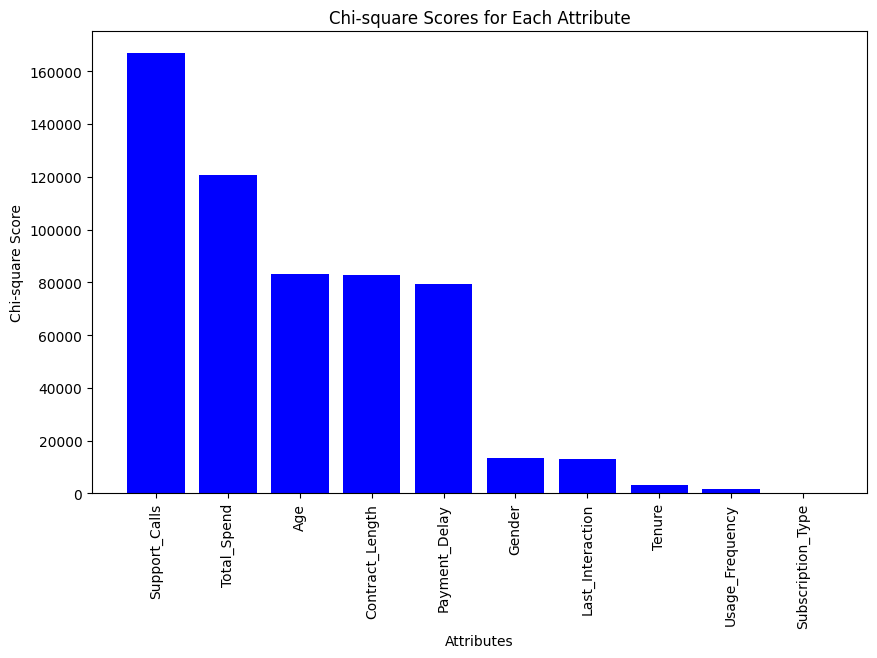

In [ ]:
re_sorted_df = re_chisquare_df.sort_values(by='Chi-square score', ascending=False)
re_sorted_df=re_sorted_df.drop(10)
plt.figure(figsize=(10, 6))
plt.bar(re_sorted_df['Column'], re_sorted_df['Chi-square score'], color='blue')
plt.xlabel('Attributes')
plt.ylabel('Chi-square Score')
plt.title('Chi-square Scores for Each Attribute')
plt.xticks(rotation=90)

### Scale using MinMaxScaler

1. Rentang Scaling: Scaler Min-Max menskalakan data ke rentang tertentu, seringkali [0, 1]. Hal ini dapat menyebabkan distorsi jika ada outlier, karena dapat secara tidak proporsional mempengaruhi penskalaan seluruh kumpulan data(Verma, 2023).
2. Sensitivitas terhadap Outliers: Karena Scaler Min-Max menggunakan nilai minimum dan maksimum data untuk penskalaan, setiap outlier dapat secara signifikan mengubah hasil, membuatnya kurang kuat dengan adanya outlier (Li et al., 2023)].
3. Kasus Penggunaan: Paling baik digunakan ketika data didistribusikan secara seragam tanpa outlier yang signifikan, atau ketika rentang data diketahui dan dikendalikan(Shved & Davydenko, 2022).

In [ ]:
scaler = MinMaxScaler()
X = df[['Support_Calls', 'Total_Spend', 'Age', 'Contract_Length','Payment_Delay']]

In [ ]:
X

,Support_Calls,Total_Spend,Age,Contract_Length,Payment_Delay
0,5.0,932,30.0,0,18.0
1,10.0,557,65.0,1,8.0
2,6.0,185,55.0,2,18.0
3,7.0,396,58.0,1,7.0
4,5.0,617,23.0,1,8.0
...,...,...,...,...,...
440827,1.0,716,42.0,0,3.0
440828,1.0,745,25.0,0,20.0
440829,1.0,977,26.0,2,5.0
440830,2.0,602,28.0,2,0.0


In [ ]:
X = scaler.fit_transform(X)

In [ ]:
y = df.iloc[:,-1:]
y

,Churn
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
440827,0.0
440828,0.0
440829,0.0
440830,0.0


In [ ]:
classes = [1, 0]
label_counts = df['Churn'].value_counts()
print(label_counts.reindex(classes))

Churn
1    249999
0    190833
Name: count, dtype: int64


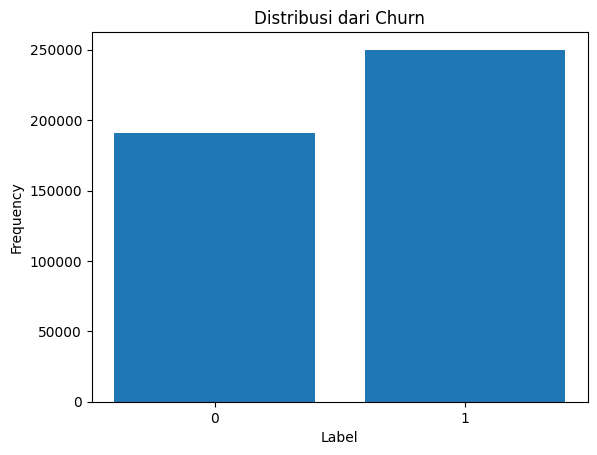

In [ ]:
label_counts_ordered = label_counts
plt.bar(label_counts_ordered.index, label_counts_ordered.values)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribusi dari Churn')
plt.xticks(classes)
plt.show()

## Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled.shape, y_resampled.shape

((349818, 5), (349818, 1))

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    # 'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Neural Network': MLPClassifier(),
    'CatBoost' : CatBoostClassifier(verbose=0),
}

Training Logistic Regression...
Logistic Regression Accuracy:  0.84
Logistic Regression Time:  0.39
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83     57160
         1.0       0.90      0.81      0.85     75090

    accuracy                           0.84    132250
   macro avg       0.84      0.85      0.84    132250
weighted avg       0.85      0.84      0.84    132250

Training Decision Tree...
Decision Tree Accuracy:  0.98
Decision Tree Time:  2.09
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     57160
         1.0       0.98      0.98      0.98     75090

    accuracy                           0.98    132250
   macro avg       0.97      0.97      0.97    132250
weighted avg       0.98      0.98      0.98    132250

Training Random Forest...
Random Forest Accuracy:  0.99
Random Forest Time:  52.98
              precision    recall  f1-score   support

         0.0       0.97   

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy:  0.97
AdaBoost Time:  12.68
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     57160
         1.0       0.99      0.96      0.98     75090

    accuracy                           0.97    132250
   macro avg       0.97      0.98      0.97    132250
weighted avg       0.98      0.97      0.97    132250

Training Naive Bayes...
Naive Bayes Accuracy:  0.90
Naive Bayes Time:  0.14
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89     57160
         1.0       0.96      0.86      0.91     75090

    accuracy                           0.90    132250
   macro avg       0.90      0.91      0.90    132250
weighted avg       0.91      0.90      0.90    132250

Training MLP Neural Network...
MLP Neural Network Accuracy:  0.99
MLP Neural Network Time:  231.12
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     57160
         1.0   

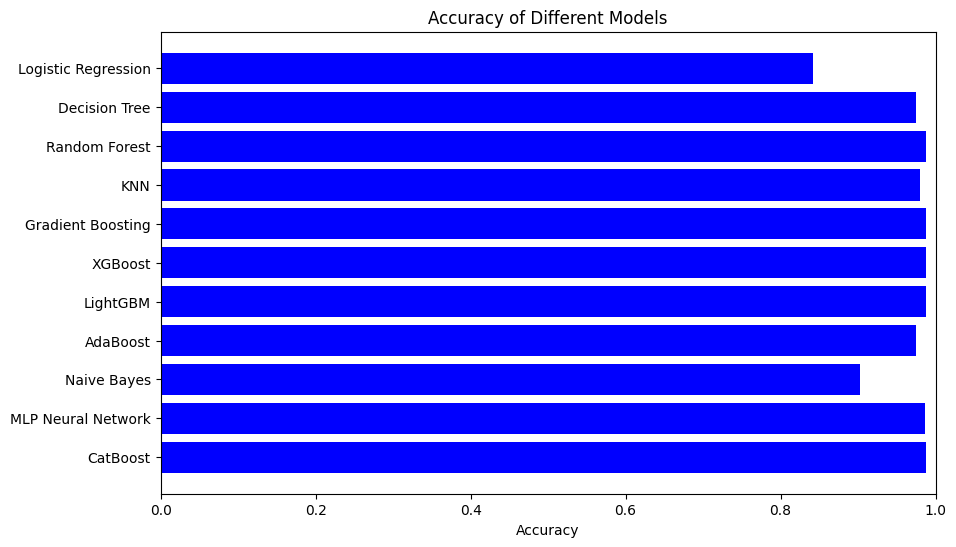

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracies = {}
for name, model in models.items():
    start = time.time()
    print(f"Training {name}...")
    model.fit(X_resampled, y_resampled.values.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

    end = time.time()
    eval_time = end-start

    print(f"{name} Accuracy: {accuracy: 2.2f}")
    print(f"{name} Time: {eval_time: 2.2f}")
    print(classification_report(y_test, y_pred))
    print("="*60)


plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='blue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()